<a href="https://colab.research.google.com/github/hussain0811/Herbal/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gronnestad, Mr. Daniel Danielsen",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [177]:
df.drop(['Cabin','PassengerId','Ticket','Name','Fare'],inplace=True,axis=1)
df1=df

In [178]:
df1['Age'] = df1['Age'].replace(np.nan,df['Age'].mean())
df1.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,NaN


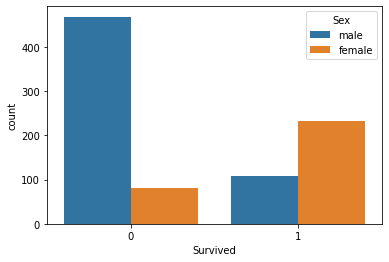

In [179]:
sns.countplot(x="Survived",hue="Sex",data=df1)

In [180]:
sex = pd.get_dummies(df1["Sex"])
df1 = df1.join(sex)
df1 = df1.drop('Sex',axis = 1)
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,female,male
0,0,3,22.0,1,0,S,0,1
1,1,1,38.0,1,0,C,1,0
2,1,3,26.0,0,0,S,1,0
3,1,1,35.0,1,0,S,1,0
4,0,3,35.0,0,0,S,0,1


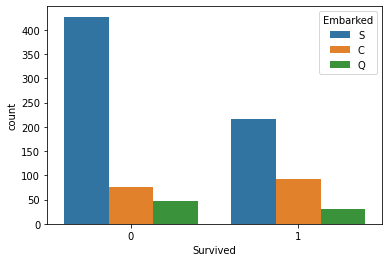

In [181]:
sns.countplot(x="Survived",hue="Embarked",data=df1)

In [182]:
Embarked = pd.get_dummies(df1["Embarked"])
df1 = df1.join(Embarked)
df1 = df1.drop('Embarked',axis = 1)
df1.head()

,Survived,Pclass,Age,SibSp,Parch,female,male,C,Q,S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


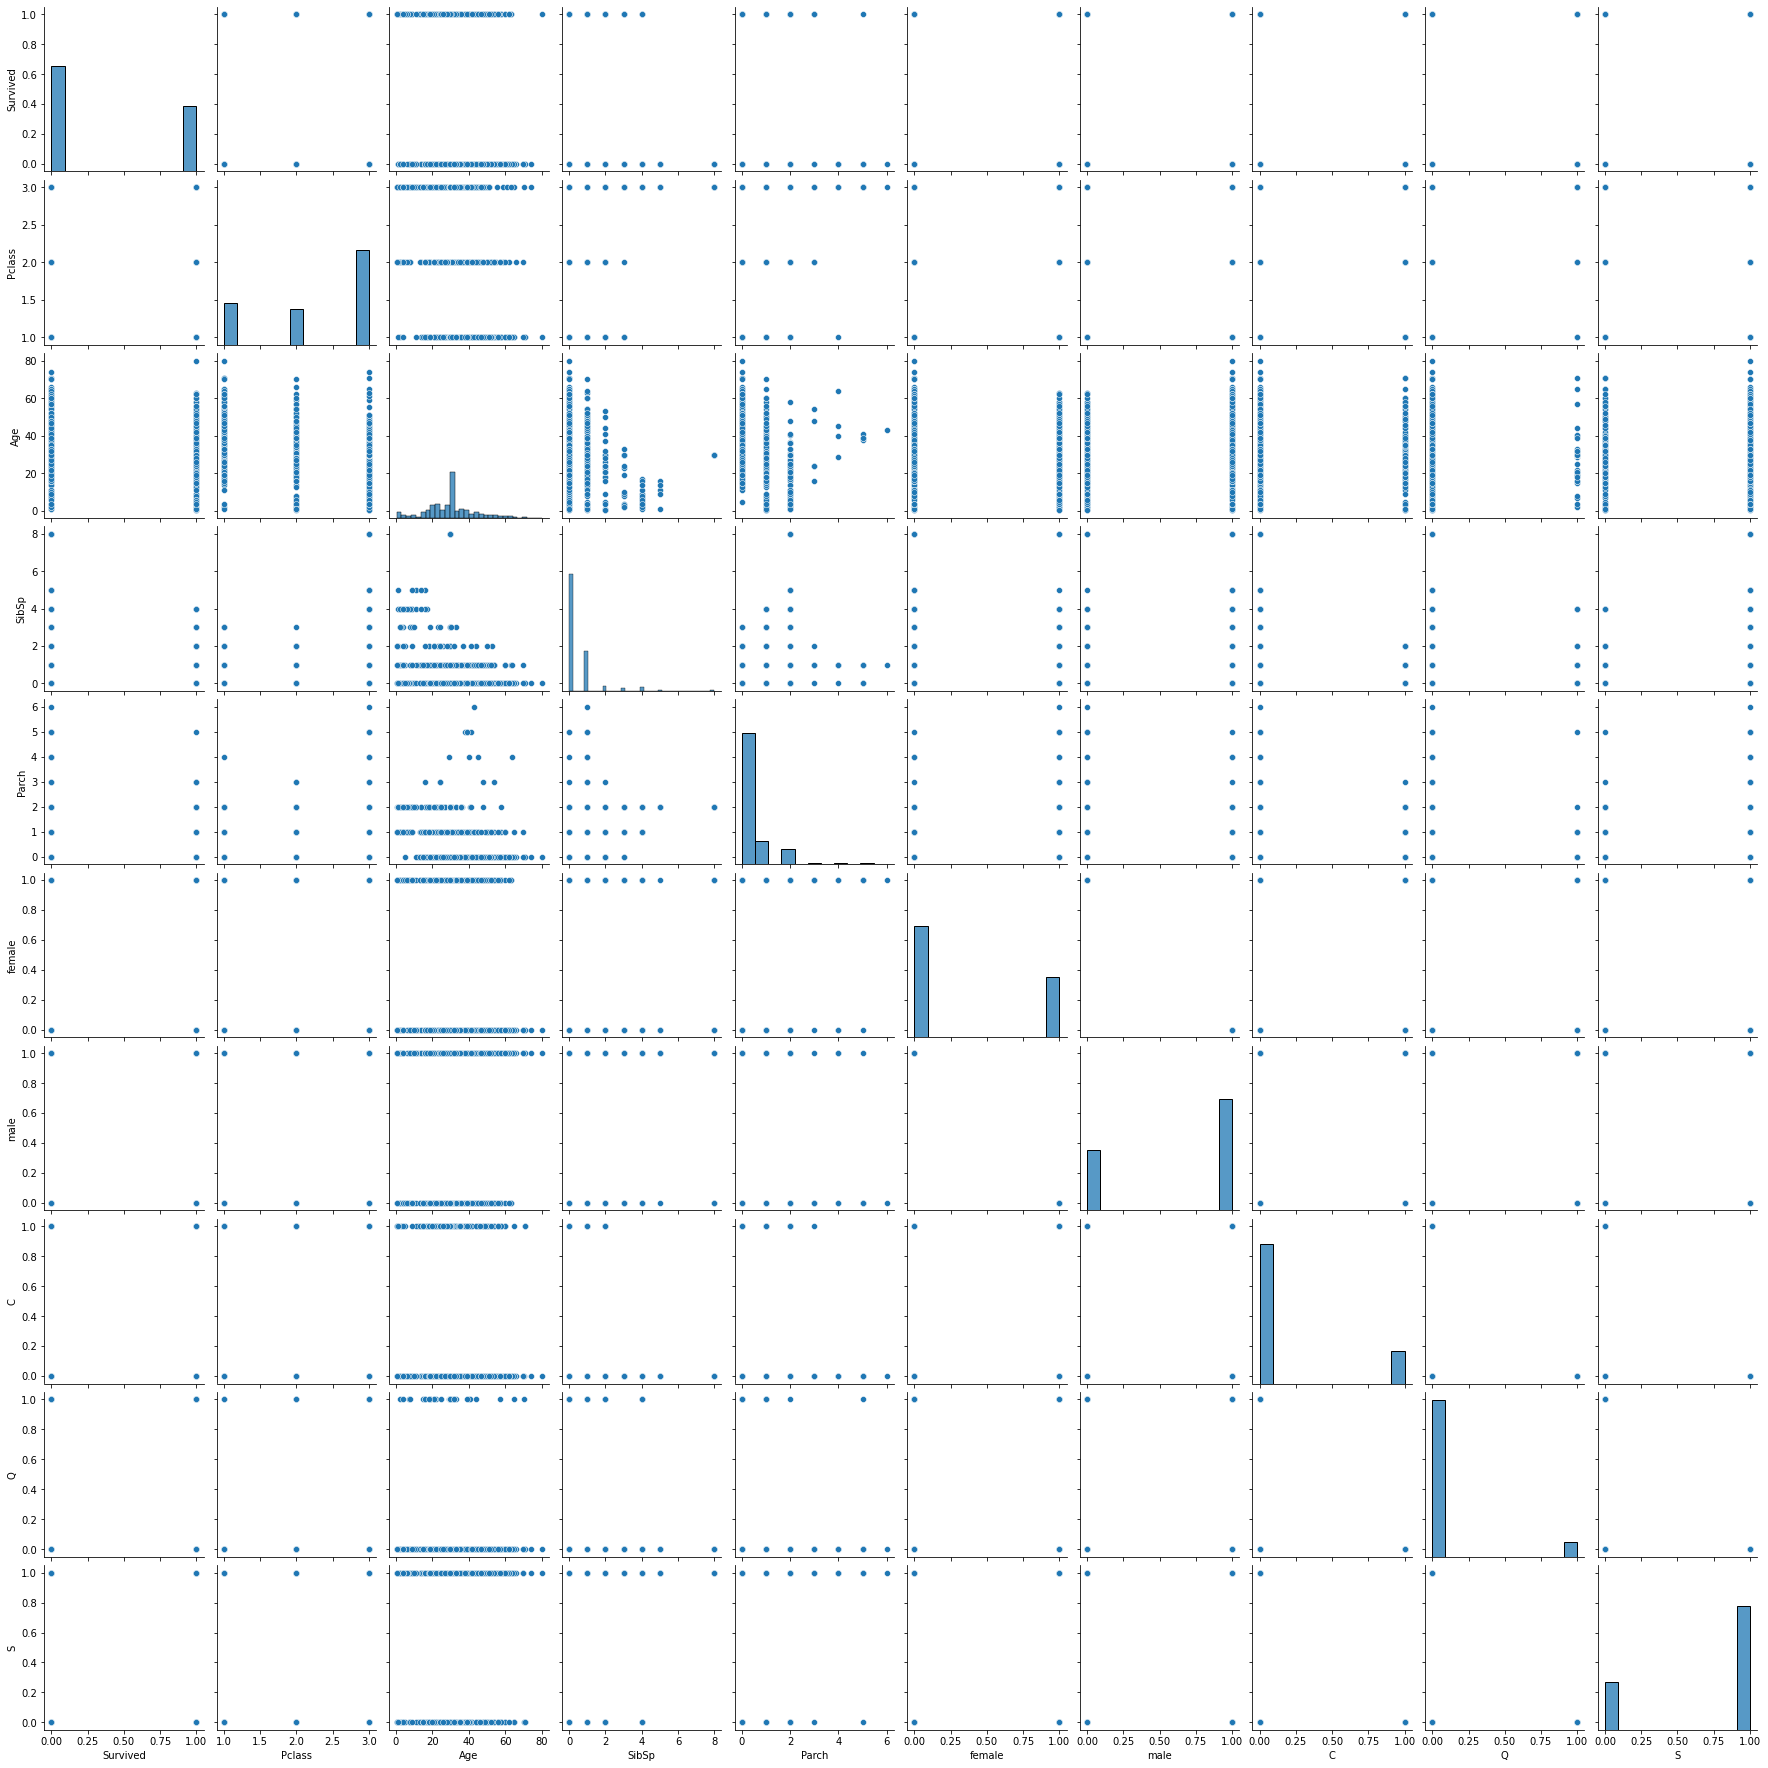

In [183]:
sns.pairplot(df1)

In [184]:
df1.corr()['Survived'].sort_values()

male       -0.543351
Pclass     -0.338481
S          -0.155660
Age        -0.069809
SibSp      -0.035322
Q           0.003650
Parch       0.081629
C           0.168240
female      0.543351
Survived    1.000000
Name: Survived, dtype: float64

In [186]:
x_train,x_test,y_train,y_test=train_test_split(df1.drop("Survived",axis=1),df1['Survived'],test_size=0.2,random_state=0)

In [187]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
predict = lg.predict(x_test)

In [203]:
lg.score(x_test,predict)


1.0

In [204]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,predict)
accuracy

0.7988826815642458